In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os

os.chdir=("/content/drive/MyDrive/MLDLProjects/FaceMaskDetect/")
Dataset='/content/drive/MyDrive/MLDLProjects/FaceMaskDetect/Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['Without_Mask', 'With_Mask']


In [8]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112,112

images=[]
labels=[]

for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path,img)
    img=cv2.imread(img_path)

    try:
      grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

      resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
      images.append(resized_img)
      labels.append(category)

    except Exception as e:
      print("Exception",e)

images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

#one hot encoding
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, random_state=0)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D

num_classes=2
batch_size=32

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      640       
                                                                 
 activation (Activation)     (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dropout (Dropout)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 64)                12390464  
                                                        

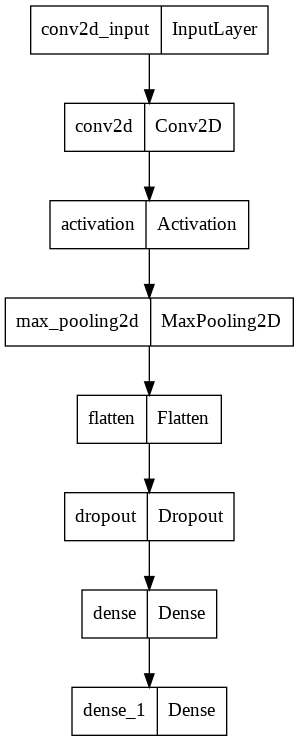

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="/content/drive/MyDrive/MLDLProjects/FaceMaskDetect/Output/model.png")

In [12]:
from tensorflow.keras.optimizers import Adam

epochs=50

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy']
              )

fitted_model = model.fit(
    train_X,
    train_y,
    epochs=epochs,
    validation_split=0.25
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 10s 308ms/step - loss: 0.7081 - accuracy: 0.6667 - val_loss: 7.8510 - val_accuracy: 0.1333
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 4.5006 - accuracy: 0.4889 - val_loss: 1.1010 - val_accuracy: 0.8667
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 2.9170 - accuracy: 0.6667 - val_loss: 0.3660 - val_accuracy: 0.8667
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8450 - accuracy: 0.6667 - val_loss: 3.2531 - val_accuracy: 0.1333
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 1.8216 - accuracy: 0.4222 - val_loss: 0.3493 - val_accuracy: 0.8667
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5276 - accuracy: 0.8444 - val_loss: 0.4484 - val_accuracy: 0.8667
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.9049 - accuracy: 0.6889 - val_loss: 0.3058 - val_accuracy: 0.8667
Epoch 8/50
2/2 [====================

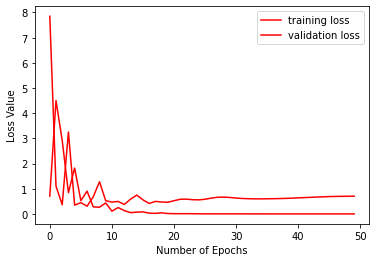

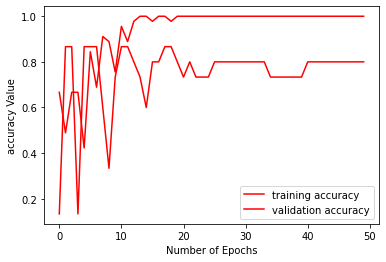

In [14]:
from matplotlib import pyplot as plt

plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],'r',label='validation loss')

plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")

plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],'r',label='validation accuracy')

plt.xlabel("Number of Epochs")
plt.ylabel("accuracy Value")

plt.legend()
plt.show()

In [15]:
model.save('/content/drive/MyDrive/MLDLProjects/FaceMaskDetect/Output/face_mask_detection_model.h5')